In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


In [4]:
df.melt()

,variable,value
0,Date,2019-10
1,Date,2019-11
2,Date,2019-12
3,Date,2020-01
4,Date,2020-02
...,...,...
216,Asus,16
217,Asus,12
218,Asus,20
219,Asus,15


In [5]:
df.shape

(13, 17)

In [6]:
13* 17

221

In [7]:
df.melt(id_vars= 'Date')

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


In [9]:
df.set_index('Date').melt()

,variable,value
0,Samsung,461
1,Samsung,461
2,Samsung,426
3,Samsung,677
4,Samsung,593
...,...,...
203,Asus,16
204,Asus,12
205,Asus,20
206,Asus,15


In [14]:
df.set_index('Date').melt().head()

,variable,value
0,Samsung,461
1,Samsung,461
2,Samsung,426
3,Samsung,677
4,Samsung,593


In [19]:
df.set_index('Date').melt(ignore_index= False).reset_index().head()

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593


In [20]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

In [22]:
df.stack()

CANCELLED     DIVERTED
AIRLINE WEEKDAY                                
AA      1       mean      0.032106     0.004699
                count  1277.000000  1277.000000
        2       mean      0.007341     0.001631
                count  1226.000000  1226.000000
        3       mean      0.011949     0.001494
...                            ...          ...
WN      5       count  1201.000000  1201.000000
        6       mean      0.010132     0.003040
                count   987.000000   987.000000
        7       mean      0.006066     0.002600
                count  1154.000000  1154.000000

[196 rows x 2 columns]

In [24]:
df.stack().stack()

AIRLINE  WEEKDAY                  
AA       1        mean   CANCELLED       0.032106
                         DIVERTED        0.004699
                  count  CANCELLED    1277.000000
                         DIVERTED     1277.000000
         2        mean   CANCELLED       0.007341
                                         ...     
WN       6        count  DIVERTED      987.000000
         7        mean   CANCELLED       0.006066
                         DIVERTED        0.002600
                  count  CANCELLED    1154.000000
                         DIVERTED     1154.000000
Length: 392, dtype: float64

In [27]:
df.stack().stack().reset_index().rename({0:'value'},axis= 1)
#df.stack().stack().reset_index().rename(columns={'level_2':'aggtype'})

,AIRLINE,WEEKDAY,level_2,level_3,value
0,AA,1,mean,CANCELLED,0.032106
1,AA,1,mean,DIVERTED,0.004699
2,AA,1,count,CANCELLED,1277.000000
3,AA,1,count,DIVERTED,1277.000000
4,AA,2,mean,CANCELLED,0.007341
...,...,...,...,...,...
387,WN,6,count,DIVERTED,987.000000
388,WN,7,mean,CANCELLED,0.006066
389,WN,7,mean,DIVERTED,0.002600
390,WN,7,count,CANCELLED,1154.000000


In [33]:
df.stack().unstack() #이미 처음의 df와 같다

CANCELLED          DIVERTED        
                     mean   count      mean   count
AIRLINE WEEKDAY                                    
AA      1        0.032106  1277.0  0.004699  1277.0
        2        0.007341  1226.0  0.001631  1226.0
        3        0.011949  1339.0  0.001494  1339.0
        4        0.015004  1333.0  0.003751  1333.0
        5        0.014151  1272.0  0.000786  1272.0
...                   ...     ...       ...     ...
WN      3        0.014118  1275.0  0.001569  1275.0
        4        0.007911  1264.0  0.003165  1264.0
        5        0.005828  1201.0  0.000000  1201.0
        6        0.010132   987.0  0.003040   987.0
        7        0.006066  1154.0  0.002600  1154.0

[98 rows x 4 columns]

In [32]:
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

#### 알아둘 점 . 
melt, stack, set_index와 reset_index를 잘 이용한다면 \
tidydata를 만들기 용이하다.

## tidy data 란 무엇인가?

`-` 느낌: ggplot으로 시각화 하기 좋은 데이터 + pandas 로 qeury ,groupby 등을 쓰기 좋은 자료

`*` 각 변수들은 무조건 한 열을 가져야 한다\
`*` 각 관측치들은 무조건 한 행을 가져야 한다.\
`*` 각 값들은 그것만의 cell을 가져야 한다

In [41]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df.head()

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20


`*` 식견: 위의 데이터는 tidy data 가 아니다.\
`*` 정의에 의해 : 하나의 observation이 하나의 행을 차지하지 못하고 있다. \
`*` 직관적으로 해보자: 회사별로 색을 다르게 하여 x:'Date' , y:'판매량'을 나타내고 싶다면?

In [45]:
df.set_index('Date').stack().reset_index().rename({'level_1':'Company',0:'Sales'},axis=1)

,Date,Company,Sales
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


In [48]:
df.melt(id_vars = 'Date') #so easy

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


In [53]:
df.set_index('Date').head()

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20


In [56]:
df.set_index('Date').melt() #날짜의 데이터가 손실된 모습
#손실을 막기위해 한 행동 : ignore_index를 False 할당.

,variable,value
0,Samsung,461
1,Samsung,461
2,Samsung,426
3,Samsung,677
4,Samsung,593
...,...,...
203,Asus,16
204,Asus,12
205,Asus,20
206,Asus,15


In [60]:
df.set_index('Date').melt(ignore_index = False).reset_index()

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


## 예제 2: multi_indexed data

In [62]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

In [69]:
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

In [71]:
df.melt(ignore_index= False).reset_index()

,AIRLINE,WEEKDAY,variable_0,variable_1,value
0,AA,1,CANCELLED,mean,0.032106
1,AA,2,CANCELLED,mean,0.007341
2,AA,3,CANCELLED,mean,0.011949
3,AA,4,CANCELLED,mean,0.015004
4,AA,5,CANCELLED,mean,0.014151
...,...,...,...,...,...
387,WN,3,DIVERTED,count,1275.000000
388,WN,4,DIVERTED,count,1264.000000
389,WN,5,DIVERTED,count,1201.000000
390,WN,6,DIVERTED,count,987.000000


## barplot

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')\
.query('Nationality=="Korea Republic" or Nationality=="Japan"')\
[['Nationality','Overall','Age']].reset_index(drop=True)
df

,Nationality,Overall,Age
0,Korea Republic,89,28
1,Japan,77,28
2,Japan,73,28
3,Korea Republic,72,31
4,Japan,71,28
...,...,...,...
456,Japan,59,21
457,Korea Republic,60,21
458,Japan,54,17
459,Korea Republic,51,20


### Geom_col

In [78]:
data_ = df.groupby(by = 'Nationality').agg({'Overall':np.mean}).reset_index()

In [79]:
data_

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


#### 예제1 : 능력치 비교

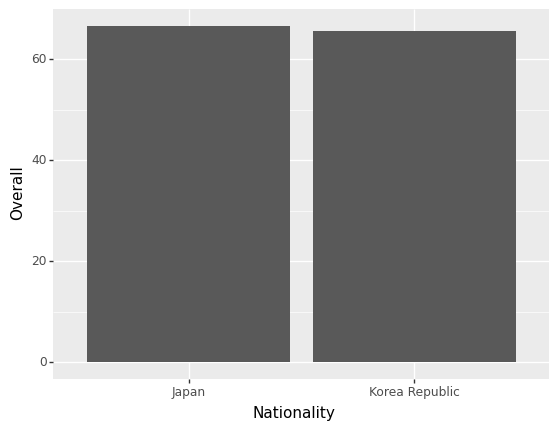

<ggplot: (169460081631)>

In [82]:
#색이 맛이 없다
ggplot(data= data_) + geom_col(aes(x='Nationality',y='Overall'))

#### 예제2 능력치 비교 + 색상 변경

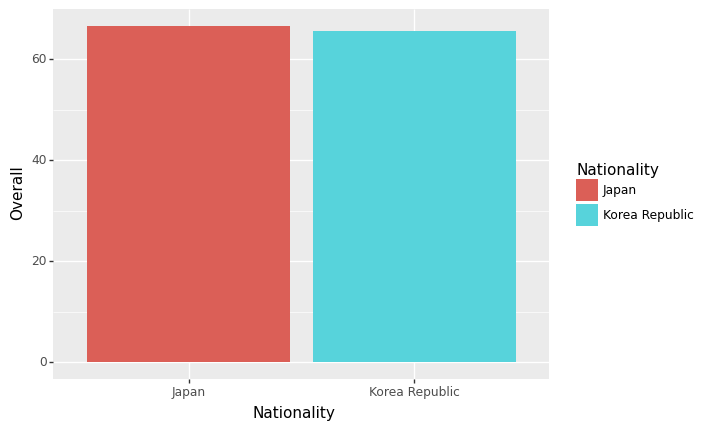

<ggplot: (169460114439)>

In [83]:
ggplot(data= data_) + geom_col(aes(x='Nationality',y='Overall',fill= 'Nationality'))

#### 예제 3 평균연령 비교

In [89]:
data_=df.groupby('Nationality').agg({'Age':np.mean}).reset_index()
data_

,Nationality,Age
0,Japan,26.084507
1,Korea Republic,27.158192


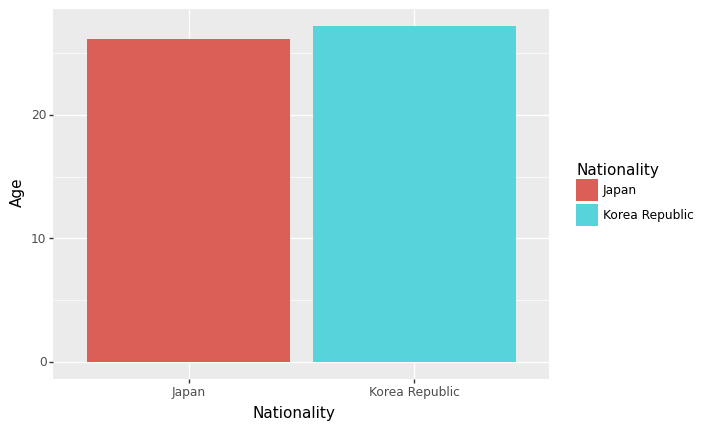

<ggplot: (169462339449)>

In [90]:
ggplot(data= data_) + geom_col(aes(x='Nationality',y='Age',fill = 'Nationality'))

### geom_col + dodge

#### 예시1 평균 연령과 평균 능력치 비교

In [99]:
data_ = df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename(columns ={0:'value'})
data_

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


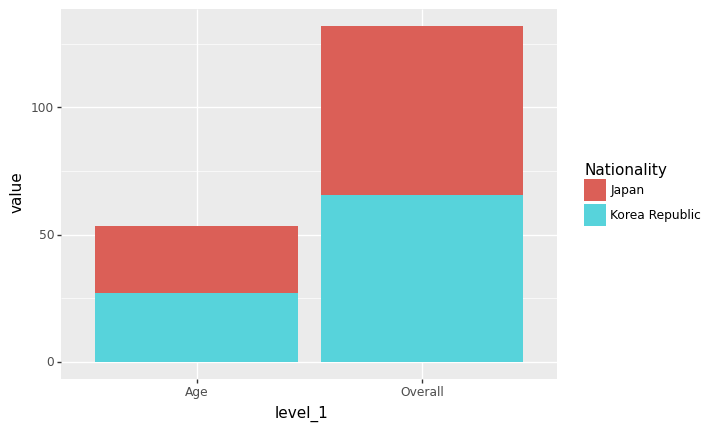

<ggplot: (169463452170)>

In [103]:
#이상한 꼴
ggplot(data = data_) + geom_col(aes(x='level_1',y='value',fill='Nationality'))

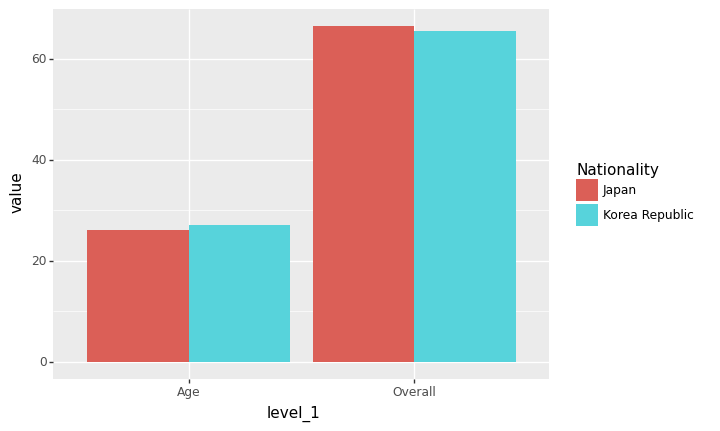

<ggplot: (169463484510)>

In [104]:
#position = dodge 할당
ggplot(data = data_) + geom_col(aes(x='level_1',y='value',fill='Nationality'),position = 'dodge')

### geom_col + corrd_flip()

#### 예시1: 평균 연령과 평균 능력치를 비교해보고싶다

In [110]:
data_ = df.groupby(by = 'Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data_

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


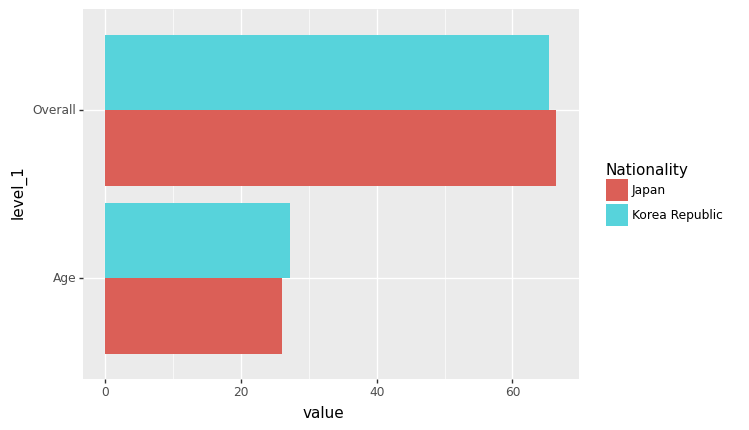

<ggplot: (169460089718)>

In [112]:
ggplot(data_)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+coord_flip()

### geom-bar + facet_wrap(var)

#### 예시1 평균 연령과 평균 능력치의 면 분할

In [115]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


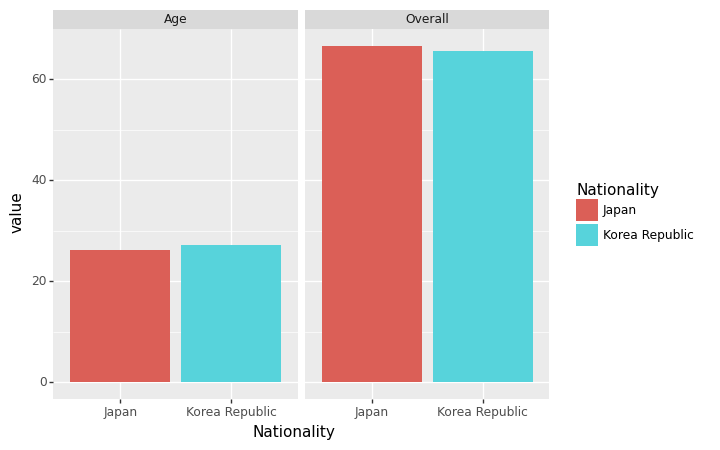

<ggplot: (169463481549)>

In [117]:
ggplot(data) + geom_col(aes(x='Nationality',fill='Nationality',y='value'),position = 'dodge')\
+ facet_wrap('level_1')

#### 예시2 평균 나이와 평균 능력치를 같은 국가끼리 나누자

In [119]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


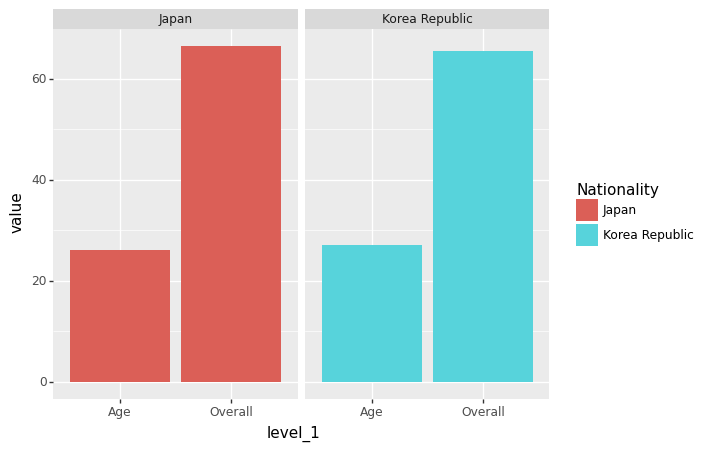

<ggplot: (169464819649)>

In [120]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+facet_wrap('Nationality')

### geom_bar + facet_grid('var_y ~ varx')

#### 예시1 한국과 일본의 평균 연령 + 평균 능력치 + 최대 능력치 비교 (면분할)

In [152]:
df.groupby('Nationality').agg({'Overall':[np.mean,np.max],'Age':np.mean})\
.stack().stack().reset_index()

,Nationality,level_1,level_2,0
0,Japan,amax,Overall,79.000000
1,Japan,mean,Age,26.084507
2,Japan,mean,Overall,66.478873
3,Korea Republic,amax,Overall,89.000000
4,Korea Republic,mean,Age,27.158192
5,Korea Republic,mean,Overall,65.457627


In [153]:
data=df.groupby('Nationality').agg({'Overall':[np.mean,np.max],'Age':np.mean})\
.melt(ignore_index=False).reset_index()
data

#stack + reset_index 와 melt(ignore_index = False) 는 변수 이름이 좀 다르다

,Nationality,variable_0,variable_1,value
0,Japan,Overall,mean,66.478873
1,Korea Republic,Overall,mean,65.457627
2,Japan,Overall,amax,79.000000
3,Korea Republic,Overall,amax,89.000000
4,Japan,Age,mean,26.084507
5,Korea Republic,Age,mean,27.158192


In [145]:
data = df.groupby('Nationality').agg({'Overall':[np.mean,np.max],'Age':np.mean}).melt(ignore_index=False).reset_index()

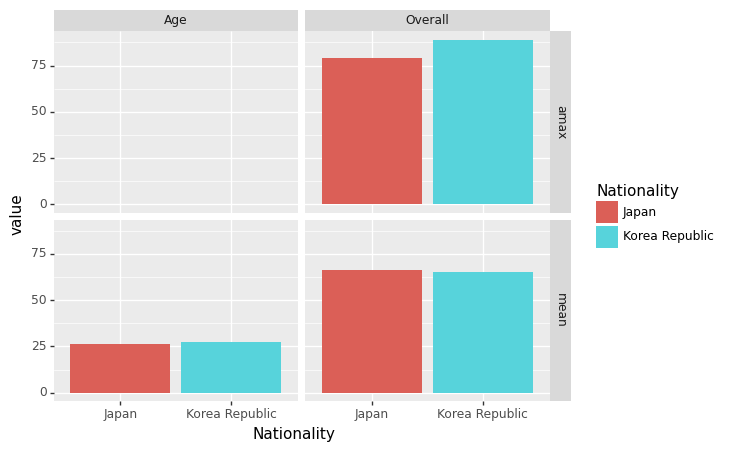

<ggplot: (169465466103)>

In [148]:
ggplot(data = data) + geom_col(aes(x='Nationality',y='value',fill='Nationality'),position='dodge')\
+facet_grid('variable_1~variable_0')

In [154]:
data= df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


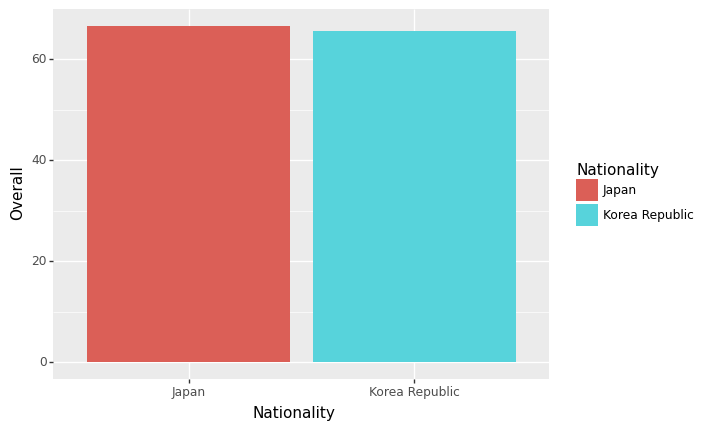

<ggplot: (169465827566)>

In [157]:
# 같은 그림을 나타내지만 geom_col이 조금 더 용이
ggplot(data)+geom_bar(aes(x='Nationality',y='Overall',fill='Nationality'),stat='identity')
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))

## 과제

In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/HRDataset_v14.csv')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [167]:
df.groupby(['Sex','Salary']).agg({'Salary':np.mean}).melt(ignore_index = False).reset_index()

,Sex,Salary,variable,value
0,F,45046,Salary,45046.0
1,F,45069,Salary,45069.0
2,F,45395,Salary,45395.0
3,F,45433,Salary,45433.0
4,F,45998,Salary,45998.0
...,...,...,...,...
304,M,140920,Salary,140920.0
305,M,148999,Salary,148999.0
306,M,157000,Salary,157000.0
307,M,170500,Salary,170500.0


In [175]:
data = df.groupby(['Sex']).agg({'Salary':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Sex,level_1,value
0,F,Salary,67786.727273
1,M,Salary,70629.400000


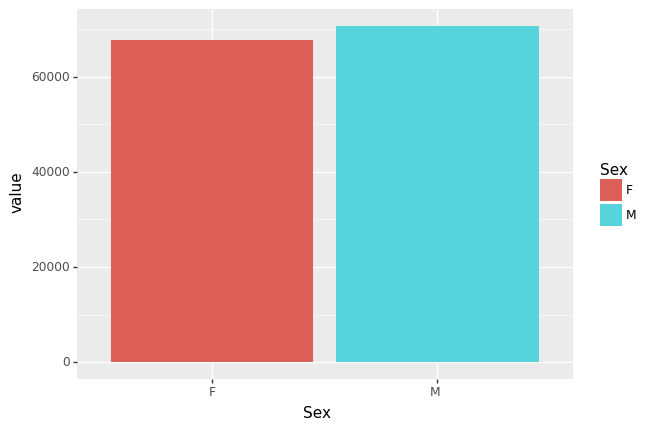

<ggplot: (169469089241)>

In [176]:
ggplot(data) + geom_col(aes(x= 'Sex', y='value',fill='Sex'))

In [181]:
data = df.groupby(['Sex','RaceDesc']).agg({'Salary':np.mean}).melt(ignore_index= False).reset_index()
data

,Sex,RaceDesc,variable,value
0,F,American Indian or Alaska Native,Salary,63436.500000
1,F,Asian,Salary,67520.117647
2,F,Black or African American,Salary,66963.829787
3,F,Two or more races,Salary,58068.500000
4,F,White,Salary,68846.519231
5,M,American Indian or Alaska Native,Salary,70545.000000
6,M,Asian,Salary,69939.416667
7,M,Black or African American,Salary,85066.121212
8,M,Hispanic,Salary,83667.000000
9,M,Two or more races,Salary,62313.800000


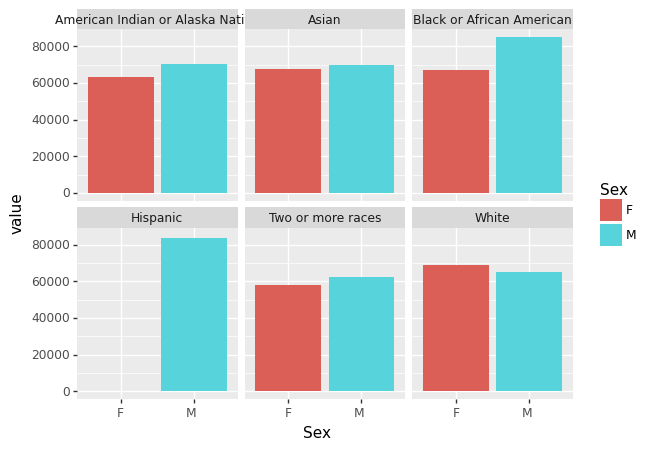

<ggplot: (169469094557)>

In [182]:
ggplot(data) + geom_col(aes(x='Sex',y='value',fill='Sex')) + facet_wrap('RaceDesc')

# 10주차 11월 9일

In [3]:
import pandas as pd
import numpy as np
from plotnine import *

In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

,department,result,gender,count
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204


## 상황1

### df1

In [11]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()

,gender,result,count
0,female,fail,1063
1,female,pass,772
2,male,fail,1291
3,male,pass,1400


### df2

In [14]:
df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,gender,count2
0,female,1835
1,male,2691


In [20]:
data1 = df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate= count/count2')

#### 시각화 1

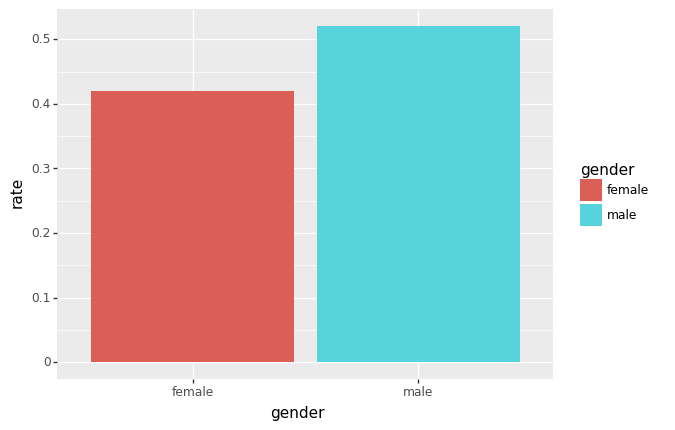

<ggplot: (167874324218)>

In [24]:
ggplot(data1.query('result== "pass"')) + geom_col(aes(x='gender',fill='gender',y='rate'))

#### 시각화2

In [27]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,department,gender,count2
0,A,female,108
1,A,male,825
2,B,female,25
3,B,male,560
4,C,female,593
5,C,male,325
6,D,female,375
7,D,male,417
8,E,female,393
9,E,male,191


## 상황2 : 학과별 합격률

### df2

In [28]:
df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')

,department,result,gender,count,count2,rate
0,A,fail,female,19,108,0.175926
1,A,pass,female,89,108,0.824074
2,A,fail,male,314,825,0.380606
3,A,pass,male,511,825,0.619394
4,B,fail,female,7,25,0.280000
5,B,pass,female,18,25,0.720000
6,B,fail,male,208,560,0.371429
7,B,pass,male,352,560,0.628571
8,C,fail,female,391,593,0.659359
9,C,pass,female,202,593,0.340641


#### 시각화1

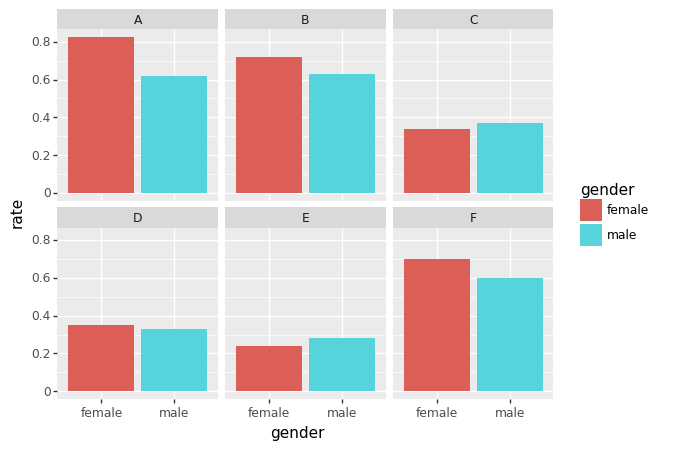

<ggplot: (167874317267)>

In [33]:
data2=df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))\
+facet_wrap('department')

#### 해석: 전체로 보면 남학생들의 합격률이 높았는데 개별적으로 보니 여자가 더 높다

`왜?` : 여자들이 합격하기 더 어려운 학과에 지원했기 때문.

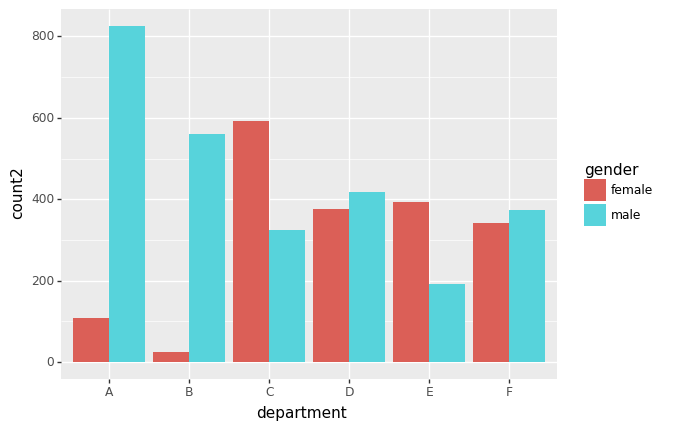

<ggplot: (167874579402)>

In [37]:
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='department',y='count2',fill='gender'),position='dodge')